In [1]:
import pandas as pd
import numpy as np

In [2]:
matches_raw = pd.read_csv('matches_big.csv')
players_raw = pd.read_csv('players_big.csv')

In [3]:
matches_raw.head()

,Date,Team1,Team2,Final Result 1,Final Result 2,Tournament,Link Stats
0,28th of April 2020,Thunder Logic,AA,0,2,eFire Master League North America Season 2,https://www.hltv.org//stats/matches/73666/thun...
1,28th of April 2020,W7M,DETONA,2,0,CLUTCH Season 2,https://www.hltv.org//stats/matches/73665/w7m-...
2,27th of April 2020,Alma,Keyd,1,1,CLUTCH Season 2,https://www.hltv.org//stats/matches/73664/alma...
3,27th of April 2020,AA,ETHEREAL,2,1,eFire Master League North America Season 2,https://www.hltv.org//stats/matches/73663/aa-v...
4,27th of April 2020,Keep the Comms Up,Thunder Logic,1,2,eFire Master League North America Season 2,https://www.hltv.org//stats/matches/73662/keep...


In [4]:
players_raw.head()

,Date,Team1,Team2,Final Result 1,Final Result 2,Tournament,Player Team,Player,KD,ADR,...,Overal Kill / Death,Overall Kill / Round,Overall Rounds with Kills,Overall Kill - Death Diff,Opening Total Kills,Opening Total Deaths,Opening Kill Ratio,Opening Kill rating,Opening Team win percent after 1st kill,Opening 1st kill in won rounds
0,28th of April 2020,Thunder Logic,AA,0,2,eFire Master League North America Season 2,Thunder Logic,Bryce 'PureR' Lovell,26-35,-9,...,1.05,0.77,1904,125,423,390,1.08,1.06,67.8%,15.9%
1,28th of April 2020,Thunder Logic,AA,0,2,eFire Master League North America Season 2,Thunder Logic,Andy 'Andersin' Collins,31-40,-9,...,0.95,0.70,1106,-84,241,292,0.83,0.96,66.4%,13.7%
2,28th of April 2020,Thunder Logic,AA,0,2,eFire Master League North America Season 2,Thunder Logic,Brian 'Brian2K' Ladron De Guevara,24-38,-14,...,1.14,0.77,1003,188,235,185,1.27,1.11,69.8%,17.2%
3,28th of April 2020,Thunder Logic,AA,0,2,eFire Master League North America Season 2,Thunder Logic,Sean 'Inseaniac' Morrison,23-38,-15,...,0.80,0.57,290,-101,42,64,0.66,0.81,66.7%,8.7%
4,28th of April 2020,Thunder Logic,AA,0,2,eFire Master League North America Season 2,Thunder Logic,Brandon 'Sharkie' Ly,25-37,-12,...,0.77,0.58,438,-189,75,124,0.60,0.82,73.3%,11.4%


In [5]:
#creating Date + team1 + team2 +finalresult1 + finalresult2 + tournament column to cross data on matches
matchcolumn = []

i = 0
while i <= (matches_raw.shape[0]-1):
    date = matches_raw.iloc[i]['Date']
    team1 = matches_raw.iloc[i]['Team1']
    team2 = matches_raw.iloc[i]['Team2']
    fr1= matches_raw.iloc[i]['Final Result 1']
    fr2= matches_raw.iloc[i]['Final Result 2']
    tournament= matches_raw.iloc[i]['Tournament']
    
    matchcolumn.append(str(date)+str(team1)+str(team2)+str(fr1)+str(fr2)+str(tournament))
    i+=1
    
matches_raw['Match column']=matchcolumn

#creating Date + team1 + team2 +finalresult1 + finalresult2 + tournament column to cross data on players
matchcolumn = []

i = 0
while i <= (players_raw.shape[0]-1):
    date = players_raw.iloc[i]['Date']
    team1 = players_raw.iloc[i]['Team1']
    team2 = players_raw.iloc[i]['Team2']
    fr1= players_raw.iloc[i]['Final Result 1']
    fr2= players_raw.iloc[i]['Final Result 2']
    tournament= players_raw.iloc[i]['Tournament']
    
    matchcolumn.append(str(date)+str(team1)+str(team2)+str(fr1)+str(fr2)+str(tournament))
    i+=1
    
players_raw['Match column']=matchcolumn

In [6]:
total_adr_team1 = []
total_adr_team2 = []

i = 0 
while i <= (matches_raw.shape[0]-1):
    total1=players_raw[players_raw['Match column']==matches_raw.iloc[i]['Match column']]
    total=total1[total1['Player Team']==matches_raw.iloc[i]['Team1']].sum()['ADR']
    total_adr_team1.append(total)
    
    total2=players_raw[players_raw['Match column']==matches_raw.iloc[i]['Match column']]
    total2=total1[total1['Player Team']==matches_raw.iloc[i]['Team2']].sum()['ADR']
    total_adr_team2.append(total2)
    
    i+=1
    
matches_raw['Total KD Team1']=total_adr_team1
matches_raw['Total KD Team2']=total_adr_team2

In [7]:
#make team 1 victory column
team1Victory = []
i = 0 
while i <= (matches_raw.shape[0]-1):
    if matches_raw.iloc[i]['Final Result 1']>matches_raw.iloc[i]['Final Result 2']:
        team1Victory.append(1)
    elif matches_raw.iloc[i]['Final Result 1']<matches_raw.iloc[i]['Final Result 2']:
        team1Victory.append(0)
    else:
        team1Victory.append(2)
    i+=1
        
matches_raw['Team1 victory']=team1Victory

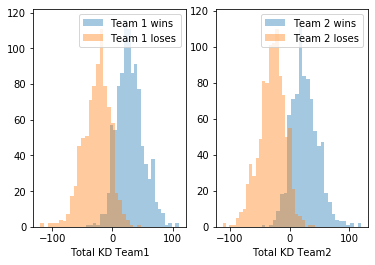

In [8]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
sn.distplot(a=matches_raw[matches_raw['Team1 victory']==1]['Total KD Team1'],label='Team 1 wins',kde=False)
sn.distplot(a=matches_raw[matches_raw['Team1 victory']==0]['Total KD Team1'],label='Team 1 loses',kde=False)
plt.legend()

plt.subplot(1,2,2)
sn.distplot(a=matches_raw[matches_raw['Team1 victory']==0]['Total KD Team2'],label='Team 2 wins',kde=False)
sn.distplot(a=matches_raw[matches_raw['Team1 victory']==1]['Total KD Team2'],label='Team 2 loses',kde=False)
plt.legend()


plt.show()

As we can see on the distribution plot above, most of the time team 1 is the winner team, it has a positive total kill difference, and we can see the same effect on team 2 plot, but on the opposite side.

In [11]:
train_X=pd.read_csv('players_big.csv')

##- create opposing team data

opposing_team = []
i = 0
while i<=(train_X.shape[0]-1):
    if train_X.iloc[i]['Player Team'] == train_X.iloc[i]['Team1']:
        opposing_team.append(train_X.iloc[i]['Team2'])
    else:
        opposing_team.append(train_X.iloc[i]['Team2'])
    i+=1
    
train_X['Opposing Team']=opposing_team

train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17603 entries, 0 to 17602
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     17603 non-null  object 
 1   Team1                                    17603 non-null  object 
 2   Team2                                    17603 non-null  object 
 3   Final Result 1                           17603 non-null  int64  
 4   Final Result 2                           17603 non-null  int64  
 5   Tournament                               17603 non-null  object 
 6   Player Team                              17603 non-null  object 
 7   Player                                   17603 non-null  object 
 8   KD                                       17603 non-null  object 
 9   ADR                                      17603 non-null  int64  
 10  KAST                                     17603

In [12]:
columnsModel = ['Player','Player Team','Overall Kills','Overall Deaths','Overal Kill / Death','Overall Kill / Round','Overall Rounds with Kills',
               'Overall Kill - Death Diff','Opening Total Kills','Opening Total Deaths','Opening Kill Ratio', 'Opening Kill rating',
               'Opening Team win percent after 1st kill','Opening 1st kill in won rounds','Opposing Team']

train_columns_X = train_X[columnsModel]
train_columns_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17603 entries, 0 to 17602
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Player                                   17603 non-null  object 
 1   Player Team                              17603 non-null  object 
 2   Overall Kills                            17603 non-null  int64  
 3   Overall Deaths                           17603 non-null  int64  
 4   Overal Kill / Death                      17603 non-null  float64
 5   Overall Kill / Round                     17603 non-null  float64
 6   Overall Rounds with Kills                17603 non-null  int64  
 7   Overall Kill - Death Diff                17603 non-null  int64  
 8   Opening Total Kills                      17603 non-null  int64  
 9   Opening Total Deaths                     17603 non-null  int64  
 10  Opening Kill Ratio                       17603

In [13]:
#transform % to float

first_kill = []
win_percent=[]

i = 0
while i<=(train_columns_X.shape[0]-1):
    first_kill.append(float(train_columns_X.iloc[i]['Opening 1st kill in won rounds'][0:-1])/100)
    try:
        win_percent.append(float(train_columns_X.iloc[i]['Opening Team win percent after 1st kill'][0:-1])/100)
    except:
        win_percent.append(0)
    i+=1
    
train_columns_X['Opening 1st kill in won rounds float']=first_kill
train_columns_X['Opening Team win percent after 1st kill float']=win_percent

train_columns_X.drop(['Opening 1st kill in won rounds','Opening Team win percent after 1st kill'],axis=1,inplace=True)

train_columns_X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17603 entries, 0 to 17602
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Player                                         17603 non-null  object 
 1   Player Team                                    17603 non-null  object 
 2   Overall Kills                                  17603 non-null  int64  
 3   Overall Deaths                                 17603 non-null  int64  
 4   Overal Kill / Death                            17603 non-null  float64
 5   Overall Kill / Round                           17603 non-null  float64
 6   Overall Rounds with Kills                      17603 non-null  int64  
 7   Overall Kill - Death Diff                      17603 non-null  int64  
 8   Opening Total Kills                            17603 non-null  int64  
 9   Opening Total Deaths                           176

C:\Users\jefms\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\jefms\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\jefms\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [14]:
train_columns_y = train_X['ADR']

In [15]:
#encoding objects
import category_encoders as ce

cat_features_encoding=['Player','Player Team','Opposing Team']

target_enc=ce.TargetEncoder(cols=cat_features_encoding)

target_enc.fit(train_columns_X[cat_features_encoding],train_columns_y)

train_encoded_X = train_columns_X.join(target_enc.transform(train_columns_X[cat_features_encoding]).add_suffix('_target'))

train_encoded_X.drop(['Player','Player Team','Opposing Team'],axis=1,inplace=True)

train_encoded_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17603 entries, 0 to 17602
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Overall Kills                                  17603 non-null  int64  
 1   Overall Deaths                                 17603 non-null  int64  
 2   Overal Kill / Death                            17603 non-null  float64
 3   Overall Kill / Round                           17603 non-null  float64
 4   Overall Rounds with Kills                      17603 non-null  int64  
 5   Overall Kill - Death Diff                      17603 non-null  int64  
 6   Opening Total Kills                            17603 non-null  int64  
 7   Opening Total Deaths                           17603 non-null  int64  
 8   Opening Kill Ratio                             17603 non-null  float64
 9   Opening Kill rating                            176

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [17]:
def score(model,modelname):
    score = -1*cross_val_score(model,train_encoded_X,train_columns_y,
                                cv=5,
                                scoring='neg_mean_absolute_error')
    print('Target encoding '+modelname+':')
    print(score.mean())

In [18]:
for i in range(350,800,50):
    XGBmodel=XGBRegressor(n_estimators=i,learning_rate=0.01)

    score(XGBmodel,'XGB')

Target encoding XGB:
7.412924009161044
Target encoding XGB:
7.418158787888041
Target encoding XGB:
7.423089915026301
Target encoding XGB:
7.427988940256199
Target encoding XGB:
7.431310871365712
Target encoding XGB:
7.434676447002488
Target encoding XGB:
7.437880732183386
Target encoding XGB:
7.442309479042403
Target encoding XGB:
7.4477246498924075


In [19]:
for i in range(50,500,50):
    RandomForestmodel=RandomForestRegressor(n_estimators=i,random_state=1)

    score(RandomForestmodel,'Random Forest')

Target encoding Random Forest:
8.0092776444902
Target encoding Random Forest:
7.984273002713896
Target encoding Random Forest:
7.978931528564162
Target encoding Random Forest:
7.974462026236084
Target encoding Random Forest:
7.974472371023293
Target encoding Random Forest:
7.9742159920399915
Target encoding Random Forest:
7.972092796515533
Target encoding Random Forest:
7.970924964217495
Target encoding Random Forest:
7.9689166725546885


In [21]:
X_train,X_valid,y_train,y_valid = train_test_split(train_encoded_X,train_columns_y,train_size=0.75,test_size=0.25,random_state=0)

We follow with XGBoost which showed a smaller error.

In [22]:
from sklearn import model_selection
param_test_1={
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

gsearch1 = model_selection.GridSearchCV(XGBRegressor(n_estimators=250,learning_rate=0.01,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test_1,scoring='neg_mean_absolute_error',cv=5,n_jobs=4,iid=False)
gsearch1.fit(X_train,y_train)
print(gsearch1.best_params_)

C:\Users\jefms\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'max_depth': 5, 'min_child_weight': 5}


In [23]:
param_test_2={
    'max_depth':range(1,4,1),
    'min_child_weight':range(0,1,1)
}

gsearch2 = model_selection.GridSearchCV(XGBRegressor(n_estimators=150,learning_rate=0.011,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test_2,scoring='neg_mean_absolute_error',cv=5,n_jobs=4,iid=False)
gsearch2.fit(X_train,y_train)
print(gsearch2.best_params_)

{'max_depth': 3, 'min_child_weight': 0}


In [24]:
param_test_3={
    'min_child_weight':range(-2,1,1)
}

gsearch3 = model_selection.GridSearchCV(XGBRegressor(n_estimators=150,learning_rate=0.011,max_depth=3,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test_3,scoring='neg_mean_absolute_error',cv=5,n_jobs=4,iid=False)
gsearch3.fit(X_train,y_train)
print(gsearch3.best_params_)

{'min_child_weight': 0}


In [25]:
param_test_4={
    'gamma':[i/10.0 for i in range (0,5)]
}

gsearch4 = model_selection.GridSearchCV(XGBRegressor(n_estimators=250,learning_rate=0.011,max_depth=5,min_child_weight=5,gamma=0,subsample=0.8,colsample_bytree=0.8,nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test_4,scoring='neg_mean_absolute_error',cv=5,n_jobs=4,iid=False)
gsearch4.fit(X_train,y_train)
print(gsearch4.best_params_)

{'gamma': 0.0}


In [27]:
param_test_5={
    'gamma':[i/10.0 for i in range (-5,1)]
}

gsearch5 = model_selection.GridSearchCV(XGBRegressor(n_estimators=250,learning_rate=0.011,max_depth=5,min_child_weight=5,gamma=0,subsample=0.8,colsample_bytree=0.8,nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test_4,scoring='neg_mean_absolute_error',cv=5,n_jobs=4,iid=False)
gsearch5.fit(X_train,y_train)
print(gsearch5.best_params_)

{'gamma': 0.0}


In [28]:
for i in range(50,550,50):
    XGBmodel=XGBRegressor(n_estimators=i,learning_rate=0.011,max_depth=5,min_child_weight=5,gamma=0,subsample=0.8,colsample_bytree=0.8,nthread=4,scale_pos_weight=1,seed=27)
    print(i)
    score(XGBmodel,'XGB')

50
Target encoding XGB:
7.774064067045343
100
Target encoding XGB:
7.527041682458628
150
Target encoding XGB:
7.431865716611422
200
Target encoding XGB:
7.396179089597284
250
Target encoding XGB:
7.383400831682254
300
Target encoding XGB:
7.382066739680529
350
Target encoding XGB:
7.384098319892476
400
Target encoding XGB:
7.386560316612952
450
Target encoding XGB:
7.389893130859508
500
Target encoding XGB:
7.393016423951536


In [29]:
param_test_6={
    'subsample':[i/10 for i in range(6,10)],
    'colsample_bytree':[i/10 for i in range(6,10)]
}

gsearch6 = model_selection.GridSearchCV(XGBRegressor(n_estimators=300,learning_rate=0.011,max_depth=5,min_child_weight=5,gamma=0,subsample=0.8,colsample_bytree=0.8,nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test_6,scoring='neg_mean_absolute_error',cv=5,n_jobs=4,iid=False)
gsearch6.fit(X_train,y_train)
print(gsearch6.best_params_)

C:\Users\jefms\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'colsample_bytree': 0.9, 'subsample': 0.9}


In [30]:
param_test_7={
    'subsample':[i/100 for i in range(80,100,5)],
    'colsample_bytree':[i/100 for i in range(80,100,5)]
}

gsearch7 = model_selection.GridSearchCV(XGBRegressor(n_estimators=300,learning_rate=0.011,max_depth=5,min_child_weight=5,gamma=0,subsample=0.8,colsample_bytree=0.8,nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test_7,scoring='neg_mean_absolute_error',cv=5,n_jobs=4,iid=False)
gsearch7.fit(X_train,y_train)
print(gsearch7.best_params_)

{'colsample_bytree': 0.95, 'subsample': 0.85}


In [31]:
param_test_8={
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

gsearch8 = model_selection.GridSearchCV(XGBRegressor(n_estimators=300,learning_rate=0.011,max_depth=5,min_child_weight=5,gamma=0,subsample=0.85,colsample_bytree=0.95,nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test_8,scoring='neg_mean_absolute_error',cv=5,n_jobs=4,iid=False)
gsearch8.fit(X_train,y_train)
print(gsearch8.best_params_)

{'reg_alpha': 1}


In [32]:
param_test_9={
    'reg_alpha':[i/10 for i in range(1,15,1)]
}

gsearch9 = model_selection.GridSearchCV(XGBRegressor(n_estimators=300,learning_rate=0.011,max_depth=5,min_child_weight=5,gamma=0,subsample=0.85,colsample_bytree=0.95,nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test_9,scoring='neg_mean_absolute_error',cv=5,n_jobs=4,iid=False)
gsearch9.fit(X_train,y_train)
print(gsearch9.best_params_)

{'reg_alpha': 1.0}


In [33]:
for i in range(50,550,50):
    XGBmodel=XGBRegressor(n_estimators=i,learning_rate=0.011,max_depth=5,min_child_weight=5,gamma=0,subsample=0.85,colsample_bytree=0.95,nthread=4,scale_pos_weight=1,seed=27,reg_alpha=1)
    print(i)
    score(XGBmodel,'XGB')

50
Target encoding XGB:
7.7484419230819315
100
Target encoding XGB:
7.508130707047856
150
Target encoding XGB:
7.418508599241657
200
Target encoding XGB:
7.387742712788755
250
Target encoding XGB:
7.379607651477367
300
Target encoding XGB:
7.379848247732132
350
Target encoding XGB:
7.382126320714116
400
Target encoding XGB:
7.385206734070664
450
Target encoding XGB:
7.388576201216322
500
Target encoding XGB:
7.392045312600194


In [34]:
#end model
model=XGBRegressor(n_estimators=250,learning_rate=0.011,max_depth=5,min_child_weight=5,gamma=0,subsample=0.85,colsample_bytree=0.95,nthread=4,scale_pos_weight=1,seed=27,reg_alpha=1)

In [35]:
#feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(C=2,penalty='l1',random_state=1,solver='liblinear').fit(X_train,y_train)
feature_model = SelectFromModel(logistic,prefit=True)

X_train_new = feature_model.transform(X_train)

selected_features = pd.DataFrame(feature_model.inverse_transform(X_train_new),
                                index=X_train.index,
                                columns=X_train.columns)

selected_columns = selected_features.columns[selected_features.var() != 0]
X_train_featured = X_train[selected_columns]
print(selected_columns)

Index(['Overall Kills', 'Overall Deaths', 'Overal Kill / Death',
       'Overall Kill / Round', 'Overall Rounds with Kills',
       'Overall Kill - Death Diff', 'Opening Total Kills',
       'Opening Total Deaths', 'Opening Kill Ratio', 'Opening Kill rating',
       'Opening 1st kill in won rounds float',
       'Opening Team win percent after 1st kill float', 'Player_target',
       'Player Team_target', 'Opposing Team_target'],
      dtype='object')


C:\Users\jefms\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [36]:
def score2(model,modelname):
    score = -1*cross_val_score(model,X_train_featured,y_train,
                                cv=5,
                                scoring='neg_mean_absolute_error')
    print('Target encoding '+modelname+':')
    print(score.mean())


In [37]:
for i in range(50,550,50):
    XGBmodel=XGBRegressor(n_estimators=i,learning_rate=0.01,max_depth=5,min_child_weight=5,gamma=0,subsample=0.85,colsample_bytree=0.95,nthread=4,scale_pos_weight=1,seed=27,reg_alpha=1)
    print(i)
    score2(XGBmodel,'XGB')

50
Target encoding XGB:
7.771561093359362
100
Target encoding XGB:
7.514220150864412
150
Target encoding XGB:
7.409665811705324
200
Target encoding XGB:
7.367371506395204
250
Target encoding XGB:
7.350952847505523
300
Target encoding XGB:
7.347481252461611
350
Target encoding XGB:
7.346147464155917
400
Target encoding XGB:
7.34618029152958
450
Target encoding XGB:
7.347701237931967
500
Target encoding XGB:
7.350798465916355


In [38]:
model = XGBRegressor(n_estimators=300,learning_rate=0.01,max_depth=5,min_child_weight=5,gamma=0,subsample=0.85,colsample_bytree=0.95,nthread=4,scale_pos_weight=1,seed=27,reg_alpha=1)
model.fit(X_train_featured,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.95, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=27, reg_alpha=1,
             reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.85,
             tree_method=None, validate_parameters=False, verbosity=None)

In [42]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model,open(filename,'wb'))